    Beginning the Regression Preparation

In [1]:

import pandas as pd

Building a Random Forest Model

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump,load
%matplotlib inline

In [3]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

In [4]:
ML_dataset.head()

,specialty_description,nppes_provider_city,total_claim_count,total_drug_cost,total_day_supply,total_30_day_fill_count,bene_count,brand_percent_spending
0,39,9174,1946,140189.01,58605,2054.8,276,0.756466
1,108,9331,90,7561.21,2681,110.0,11,0.869739
2,32,8930,200,14549.85,7587,307.2,65,0.535970
3,70,3003,4981,258258.70,337309,11494.1,459,0.567573
4,88,7343,7165,379661.02,333309,11406.5,461,0.724479


Begin Model Building and Fitting

Input and Output

In [5]:
Labels = ML_dataset.drop(["brand_percent_spending"], axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [6]:
X = ML_dataset[Labels] #input
y = ML_dataset["brand_percent_spending"] #labels


Splitting Data into Test and Train

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into Random Forest Model with Loaded Parameters

In [8]:
best_model = load("Model_Weights\RFR\RFR_best_model") #save parameters 
print(best_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [9]:
regressor = best_model
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature Importances

In [10]:
print(regressor.feature_importances_)

[0.2461801  0.05179818 0.1033207  0.31271571 0.09208996 0.09872935
 0.095166  ]


In [11]:
coeff_df = pd.DataFrame( regressor.feature_importances_, Labels, columns=['Importances'])  
coeff_df = coeff_df[coeff_df["Importances"] != 0]
coeff_df.sort_values("Importances" ,ascending = False)

,Importances
total_drug_cost,0.312716
specialty_description,0.246180
total_claim_count,0.103321
total_30_day_fill_count,0.098729
bene_count,0.095166
total_day_supply,0.092090
nppes_provider_city,0.051798


Predictions

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)


,Actual,Predicted
121797,0.896600,0.877212
54982,0.852516,0.758318
287077,0.806244,0.727628
409706,0.582369,0.472263
270678,0.841399,0.644620
103688,0.629270,0.634274
319786,0.715088,0.689698
495660,0.389371,0.382415
355400,0.639164,0.509962
56258,0.771631,0.702930


Text(0, 0.5, 'Brand Percent Spending')

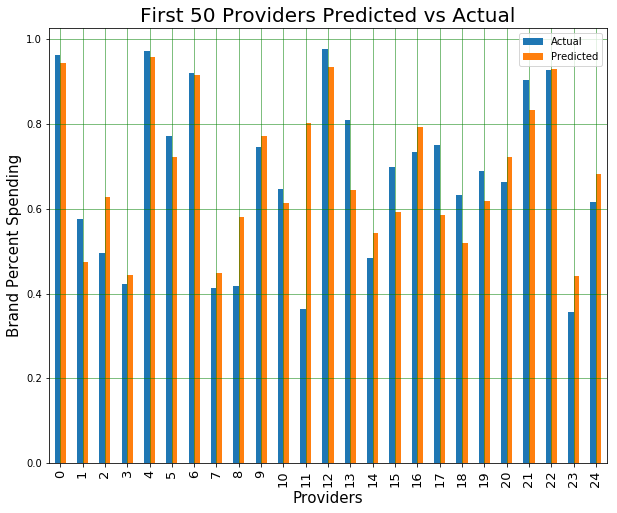

In [39]:
comparison_df.iloc[75:100].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("First 50 Providers Predicted vs Actual", fontsize = 20)
plt.xlabel("Providers", fontsize =  15)
plt.xticks(np.arange(25),range(25), fontsize = 13)
plt.ylabel("Brand Percent Spending", fontsize = 15)

Text(0.5, 1.0, 'Random Forest Model')

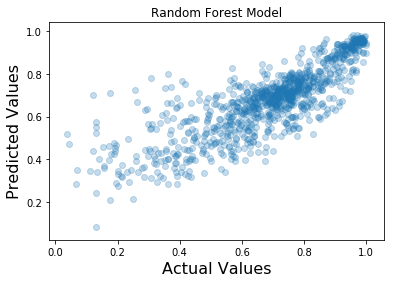

In [40]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual Values", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted Values",  fontsize = 16)
plt.title("Random Forest Model")

Statistics

In [ ]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

In [ ]:
metrics_df = pd.read_csv("data\metrics_df.csv")

In [ ]:
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "Random Forest"}, ignore_index=True)

In [ ]:
metrics_df.tail()

In [ ]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save the Trained Model

In [ ]:
dump(regressor, "Model_Weights\RFR\RFR_trainedLoaded") 